<a href="https://colab.research.google.com/github/JoanWaweru/IS2Project/blob/main/IS2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install Textblob

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import display
from textblob import TextBlob # sentiment analysis with TextBlob
import re # regex for cleaning the tweets
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read csv file into a pandas dataframe
%cd /content/drive/My Drive/safaricom dataset/
df = pd.read_csv('dataset.csv')

/content/drive/My Drive/safaricom dataset


In [4]:
# Viewing number of rows and columns in the dataset
df.shape

(4161, 19)

In [5]:
# Viewing the dataset that contains the entire csv file
df

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Wa-Pots,Itsa_Kumquat,2021-03-31T12:03:51.000Z,Wed Mar 31 12:03:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,Leilati,LeilaaAbubakar,2021-03-31T12:03:05.000Z,Wed Mar 31 12:03:05 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN,NaN
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,iamlayaway,layawayuno,2021-03-31T12:02:56.000Z,Wed Mar 31 12:02:56 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExzlwbuWUAEXRcz.jpg,NaN,NaN,NaN
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,Kiilu Kutoka Kitui 👽,mutuahkiilu,2021-03-31T12:02:39.000Z,Wed Mar 31 12:02:39 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/Exzm8SAWEAMe0qF.jpg,NaN,NaN,NaN
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,Boychild UNDER Siege😠,DARSIL254,2021-03-31T12:01:53.000Z,Wed Mar 31 12:01:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExziJdoWYAY-0tA.jpg,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,1372032135259906059,Peter_kibiro,KibiroPeter,2021-03-17T03:49:07.000Z,Wed Mar 17 03:49:07 +0000 2021,271,264,911,366,0,Blessed to be stressed ||student||• @chelseaFC,Earth,NaN,FALSE,TRUE,NaN,NaN,NaN,NaN
4157,1372032135259906059,Peter_kibiro,KibiroPeter,2021-03-17T03:49:07.000Z,Wed Mar 17 03:49:07 +0000 2021,271,264,911,366,0,Blessed to be stressed ||student||• @chelseaFC,Earth,NaN,FALSE,TRUE,NaN,NaN,NaN,NaN
4158,1245493115844263937,Kelbac Omariba 𒊹︎︎︎,omariba_ke,2020-04-01T23:28:06.000Z,Wed Apr 01 23:28:06 +0000 2020,900,1020,6107,4724,0,beast,"Thika, Kenya",https://instagram.com/omariba.k?igshid=smg5wy5...,FALSE,TRUE,NaN,NaN,NaN,NaN
4159,981797847216599040,Style by Ray,ImbayiK,2018-04-05T07:37:02.000Z,Thu Apr 05 07:37:02 +0000 2018,10570,991,2571,112704,4,Stylist || Alma & Ava ❤️ || Rhumba ❤️ || IG @s...,"Nairobi, Kenya",http://raising2.wordpress.com,FALSE,TRUE,NaN,NaN,NaN,NaN


In [6]:
# Quick look at the first few rows
display(df.head())

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Wa-Pots,Itsa_Kumquat,2021-03-31T12:03:51.000Z,Wed Mar 31 12:03:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,Leilati,LeilaaAbubakar,2021-03-31T12:03:05.000Z,Wed Mar 31 12:03:05 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN,NaN
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,iamlayaway,layawayuno,2021-03-31T12:02:56.000Z,Wed Mar 31 12:02:56 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExzlwbuWUAEXRcz.jpg,NaN,NaN,NaN
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,Kiilu Kutoka Kitui 👽,mutuahkiilu,2021-03-31T12:02:39.000Z,Wed Mar 31 12:02:39 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/Exzm8SAWEAMe0qF.jpg,NaN,NaN,NaN
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,Boychild UNDER Siege😠,DARSIL254,2021-03-31T12:01:53.000Z,Wed Mar 31 12:01:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExziJdoWYAY-0tA.jpg,NaN,NaN,NaN


In [7]:
# summarize the dataset
print(df.describe())

         Tweet Id                                               Text  \
count        4161                                               4161   
unique       3347                                               2496   
top     320662182  RT @ReubenKigame : Before I am told to be grat...   
freq          201                                                220   

                  Name               Screen Name  \
count             4161                      4161   
unique            2510                      2533   
top     Safaricom_Care  2011-06-20T09:20:08.000Z   
freq               201                       201   

                                   UTC Created At Favorites Retweets Language  \
count                             4161       4161      4161     4161     4161   
unique                            3308       3066      1004     1170     1220   
top     Mon Jun 20 09:20:08 +0000 2011    1148797         0        0       en   
freq                               201        201     

In [8]:
# Getting the independent variable (tweets to be analysed). 
# It falls on the 1st index under variable name text
# option 1:
tweets = df.iloc[:, 1].values
df = pd.DataFrame(tweets)

# Option 2:
#df = df[['text']]

In [9]:
# Viewing the df that has the tweets to be analysed
df

,0
0,@Safaricom_Care I have done that many times an...
1,RT @Elainesoya : @mwangideloh In Garissa behin...
2,RT @KUcoolkid : Are you in online business and...
3,RT @Liberal_KE : Enjoy YouTube music with safa...
4,RT @DARSIL254 : Which Paybill are you using if...
...,...
4156,Peter_kibiro
4157,Peter_kibiro
4158,Kelbac Omariba 𒊹︎︎︎
4159,Style by Ray


In [10]:
# Looking at the Target variable for missing values
df[0].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4156    False
4157    False
4158    False
4159    False
4160    False
Name: 0, Length: 4161, dtype: bool

In [11]:
# Total missing values for the target variable
df[0].isnull().sum()

0

In [12]:
# Saving the df to a new variable
df_TextBlob = df
df_TextBlob

,0
0,@Safaricom_Care I have done that many times an...
1,RT @Elainesoya : @mwangideloh In Garissa behin...
2,RT @KUcoolkid : Are you in online business and...
3,RT @Liberal_KE : Enjoy YouTube music with safa...
4,RT @DARSIL254 : Which Paybill are you using if...
...,...
4156,Peter_kibiro
4157,Peter_kibiro
4158,Kelbac Omariba 𒊹︎︎︎
4159,Style by Ray


In [13]:
# Labelling unlabelled corpus with TextBlob. 

# Getting the Polarity and Subjectivity of the unlabelled Sentiments with TextBlob
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df_TextBlob['polarity'] = df_TextBlob[0].apply(polarity)
df_TextBlob['subjectivity'] = df_TextBlob[0].apply(subjectivity)
df_TextBlob

,0,polarity,subjectivity
0,@Safaricom_Care I have done that many times an...,0.500000,0.500000
1,RT @Elainesoya : @mwangideloh In Garissa behin...,-0.250000,0.400000
2,RT @KUcoolkid : Are you in online business and...,0.091667,0.666667
3,RT @Liberal_KE : Enjoy YouTube music with safa...,0.400000,0.500000
4,RT @DARSIL254 : Which Paybill are you using if...,0.000000,0.000000
...,...,...,...
4156,Peter_kibiro,0.000000,0.000000
4157,Peter_kibiro,0.000000,0.000000
4158,Kelbac Omariba 𒊹︎︎︎,0.000000,0.000000
4159,Style by Ray,0.000000,0.000000


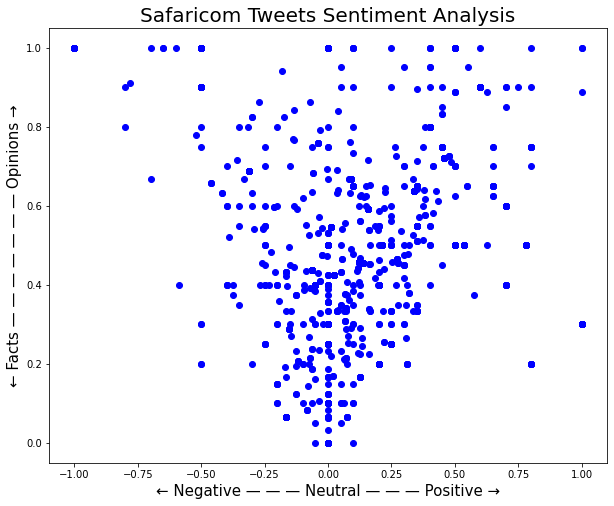

In [16]:
# Plotting the TextBlob results

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df_TextBlob.polarity.loc[Tweets]
 y = df_TextBlob.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Blue')
 
 
plt.title('Safaricom Tweets Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — Neutral — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [17]:
# Function to calculate positive, negative and neutral sentiments.
# if polarity: greater than 1 --> Positive, equal to 0 --> neutral & less than 0 --> Negative
# new polarities saved in new variable "analysis"
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df_TextBlob['analysis'] = df_TextBlob['polarity'].apply(ratio)
df_TextBlob

,0,polarity,subjectivity,analysis
0,@Safaricom_Care I have done that many times an...,0.500000,0.500000,1
1,RT @Elainesoya : @mwangideloh In Garissa behin...,-0.250000,0.400000,-1
2,RT @KUcoolkid : Are you in online business and...,0.091667,0.666667,1
3,RT @Liberal_KE : Enjoy YouTube music with safa...,0.400000,0.500000,1
4,RT @DARSIL254 : Which Paybill are you using if...,0.000000,0.000000,0
...,...,...,...,...
4156,Peter_kibiro,0.000000,0.000000,0
4157,Peter_kibiro,0.000000,0.000000,0
4158,Kelbac Omariba 𒊹︎︎︎,0.000000,0.000000,0
4159,Style by Ray,0.000000,0.000000,0


In [18]:
# Getting the total count of the polarities
df_TextBlob['analysis'].value_counts()

 0    2849
 1     705
-1     607
Name: analysis, dtype: int64

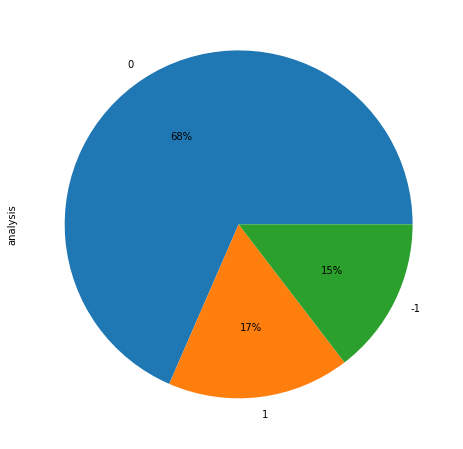

In [19]:
# Plotting the TexBlob results with a pie chart
df_TextBlob['analysis'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.show()

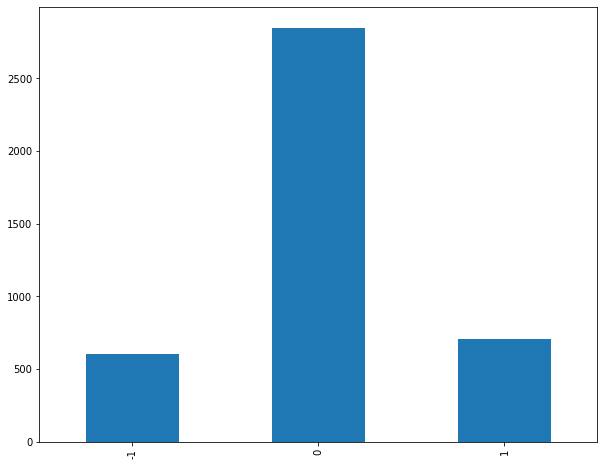

In [20]:
# Plotting the TexBlob results with a different kind of chart: bar chart
df_TextBlob['analysis'].value_counts().sort_index().plot.bar()
plt.show()

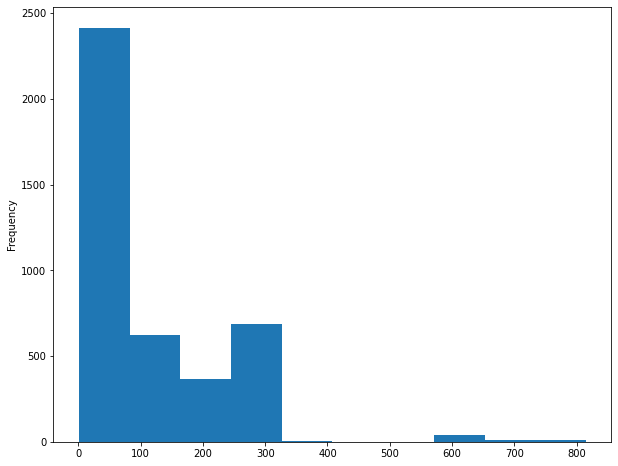

In [21]:
# Visualizing the length of the text
df_TextBlob[0].str.len().plot.hist()

In [22]:
# Data Pre-processing
# Removing the company's twitter handles as they do not add any value
df_TextBlob[0] = df_TextBlob[0].str.replace('@Safaricom_Care','')
df_TextBlob[0] = df_TextBlob[0].str.replace('@SafaricomPLC','')
df_TextBlob

,0,polarity,subjectivity,analysis
0,I have done that many times and i still get t...,0.500000,0.500000,1
1,RT @Elainesoya : @mwangideloh In Garissa behin...,-0.250000,0.400000,-1
2,RT @KUcoolkid : Are you in online business and...,0.091667,0.666667,1
3,RT @Liberal_KE : Enjoy YouTube music with safa...,0.400000,0.500000,1
4,RT @DARSIL254 : Which Paybill are you using if...,0.000000,0.000000,0
...,...,...,...,...
4156,Peter_kibiro,0.000000,0.000000,0
4157,Peter_kibiro,0.000000,0.000000,0
4158,Kelbac Omariba 𒊹︎︎︎,0.000000,0.000000,0
4159,Style by Ray,0.000000,0.000000,0


In [24]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions

corpus = []

def clean(x):
    x = re.sub(r'^RT[\s]+', '', x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'#', '', x)
    x = re.sub(r'@[A-Za-z0–9]+', '', x)
    x = x.lower() # text transform. Changing all uppercase letters to lowercase letters.
    x = x.split() # splitting each tweet sentiment into its individual words before stemming.
    ps = PorterStemmer() # calling the stemming function and assigning it to a variable 'ps'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    all_stopwords.remove('don')
    all_stopwords.remove("don't")
    all_stopwords.remove('aren')
    all_stopwords.remove("aren't")
    all_stopwords.remove('couldn')
    all_stopwords.remove("couldn't")
    all_stopwords.remove('didn')
    all_stopwords.remove("didn't")
    all_stopwords.remove("doesn't")
    all_stopwords.remove('doesn')
    all_stopwords.remove('hadn')
    all_stopwords.remove("hadn't")
    all_stopwords.remove('hasn')
    all_stopwords.remove("hasn't")
    all_stopwords.remove('haven')
    all_stopwords.remove("haven't")
    all_stopwords.remove('isn')
    all_stopwords.remove("isn't")
    all_stopwords.remove('mightn')
    all_stopwords.remove("mightn't")
    all_stopwords.remove('mustn')
    all_stopwords.remove("mustn't")
    all_stopwords.remove('needn')
    all_stopwords.remove("needn't")
    all_stopwords.remove("shan't")
    all_stopwords.remove('shouldn')
    all_stopwords.remove("shouldn't")
    all_stopwords.remove("wasn't")
    all_stopwords.remove("weren't")
    all_stopwords.remove("won't")
    all_stopwords.remove("wouldn't")
    x = [ps.stem(word) for word in x if not word in set(all_stopwords)] # removing all stopwords then stemming all other words.
    x = ' '.join(x) # combining all split words to form the original format of the tweet. 
    corpus.append(x)
    
    return x
df_TextBlob[0] = df_TextBlob[0].apply(clean)

In [25]:
# Checking the new cleaned df
df_TextBlob

,0,polarity,subjectivity,analysis
0,done mani time still get messages.,0.500000,0.500000,1
1,: garissa behind jihan center (safaricom),-0.250000,0.400000,-1
2,": onlin busi keep run bundles, worri no more, ...",0.091667,0.666667,1
3,_ke : enjoy youtub music safaricom youtub bund...,0.400000,0.500000,1
4,254 : paybil use not 4998383 buy safaricom air...,0.000000,0.000000,0
...,...,...,...,...
4156,peter_kibiro,0.000000,0.000000,0
4157,peter_kibiro,0.000000,0.000000,0
4158,kelbac omariba 𒊹︎︎︎,0.000000,0.000000,0
4159,style ray,0.000000,0.000000,0


In [26]:
# Representing Text in Numeric Form
# Creating the Bag of Words Model for TextBlob
# Bag of words takes the most frequent words used and leaves the rest.
# These frequent words are stored in the sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6660) # matrix of features
X = cv.fit_transform(corpus).toarray() # fit gets all words & transform stores the words in a column
y = df_TextBlob.iloc[:,-1].values

In [27]:
len(X[0]) # gives the number of elements in the first row as a result of tokenization

5256

In [28]:
# Splitting the dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [33]:
# Model Training 1: SVM
# The fit method of SVC class is called to train the algorithm on the training data which is passed as a parameter to the fit method.

from sklearn.svm import SVC
# svclassifier = SVC(kernel='poly', degree=8) # polynomial kernel accuracy: 0.43%
# svclassifier = SVC(kernel='rbf')  # Gaussian Kernel accuracy is: 0.74%
svclassifier = SVC(kernel='sigmoid') # Sigmoid Kernel: accuracy is: 0.72%
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [34]:
# Making Predictions
y_pred = svclassifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[ 0  0]
 [ 0  0]
 [-1 -1]
 ...
 [ 0  0]
 [ 0 -1]
 [ 1  1]]


In [35]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(cm)


              precision    recall  f1-score   support

          -1       0.81      0.81      0.81       179
           0       0.92      0.96      0.94       868
           1       0.83      0.67      0.75       202

    accuracy                           0.89      1249
   macro avg       0.86      0.81      0.83      1249
weighted avg       0.89      0.89      0.89      1249

[[145  28   6]
 [ 15 832  21]
 [ 18  48 136]]


In [36]:
# SVM accuracy
accuracy_score(y_test, y_pred)

0.8911128903122498

In [29]:
# Model training 2: Naive Bayes

# Training the Naive Bayes Model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [30]:
# Predicting the Test Result Test
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1  0]
 [-1  0]
 [-1 -1]
 ...
 [ 1  0]
 [-1 -1]
 [ 1  1]]


In [31]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(cm)


              precision    recall  f1-score   support

          -1       0.30      0.88      0.45       179
           0       0.94      0.51      0.66       868
           1       0.65      0.82      0.73       202

    accuracy                           0.61      1249
   macro avg       0.63      0.74      0.61      1249
weighted avg       0.80      0.61      0.64      1249

[[157   7  15]
 [350 444  74]
 [ 17  19 166]]


In [32]:
# Naive Bayes accuracy
accuracy_score(y_test, y_pred)

0.6140912730184147

In [45]:
# Model Training 3: Neural Network
from sklearn.neural_network import MLPClassifier

# solver='adam' - (68%) - max_iter = 1000
# solver='lbfgs' - 68.8% - max_iter = 1000
# solver='sgd' - (65.8%) - max_iter = 10000
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 10000, random_state=1)
NN.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

In [46]:
# Making Predictions
y_pred = NN.predict(X_test)

In [47]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 179   0]
 [  0 868   0]
 [  0 202   0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       179
           0       0.69      1.00      0.82       868
           1       0.00      0.00      0.00       202

    accuracy                           0.69      1249
   macro avg       0.23      0.33      0.27      1249
weighted avg       0.48      0.69      0.57      1249



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print(accuracy_score(y_test, y_pred))

0.6949559647718174
